# Comparison of PCIT and GENIE3 methods
Océane Carpentier

In [1]:
require(data.table)
require(Matrix)
require(ggplot2)
require(VennDiagram)
require(dplyr)

Loading required package: data.table

Loading required package: Matrix

Loading required package: ggplot2

Loading required package: VennDiagram

Loading required package: grid

Loading required package: futile.logger

Loading required package: dplyr


Attaching package: ‘dplyr’


The following objects are masked from ‘package:data.table’:

    between, first, last


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [2]:
setwd("/home/ocarpentier")
load("fragencode/workspace/geneswitch/results/multi/rnaseq.srnaseq/gallus_gallus/PCIT/tagiso.and.mirdeep2.PCIT/results_filtered_cor_matrix.Rdata")

In [3]:
#  Load mirdeepID to keep
ids_to_keep <- read.table("fragencode/workspace/geneswitch/results/multi/rnaseq.srnaseq/gallus_gallus/mirdeep2ok.id.txt", header = FALSE)
ids_to_keep <- unlist(ids_to_keep)
# Delete the rows of the matrix according to the indices to be kept and keep only the targets in the columns.
corMat_PCIT <- cor_data_signif[ids_to_keep, c(1:33929)]

In [4]:
dim(corMat_PCIT)

[1]  2249 33929

In [5]:
# 1 if correlation differs from 0
corMat_PCIT[corMat_PCIT!=0]<-1

In [6]:
dim(corMat_PCIT)

[1]  2249 33929

In [7]:
adjMat_PCIT_sparse <- as(corMat_PCIT, "sparseMatrix")

In [8]:
edges_PCIT <- summary(adjMat_PCIT_sparse)
edges_PCIT <- setDT(edges_PCIT)

# Associate index to locus
edges_PCIT[,i := rownames(adjMat_PCIT_sparse)[i]]
edges_PCIT[,j := colnames(adjMat_PCIT_sparse)[j]]
colnames(edges_PCIT) <- c("RegulatoryGene","TargetGene","obs_PCIT")

In [9]:
GENIE3_linklist <- data.table::fread(file = "work/result/genie3/GENIE3_score_filtered.csv",col.names = c("RegulatoryGene", "TargetGene", "Weight"), sep=",",data.table=TRUE)

In [10]:
merge_sparse = merge(GENIE3_linklist, edges_PCIT, by=c("RegulatoryGene","TargetGene"), all.x=TRUE)
set(merge_sparse,which(is.na(merge_sparse[["obs_PCIT"]])),"obs_PCIT",0)

In [11]:
rm(ids_to_keep)
rm(cor_data_signif)
rm(corMat_PCIT)
rm(adjMat_PCIT_sparse)

In [12]:
summary(merge_sparse)

 RegulatoryGene      TargetGene            Weight             obs_PCIT      
 Length:76306321    Length:76306321    Min.   :0.000e+00   Min.   :0.00000  
 Class :character   Class :character   1st Qu.:3.565e-05   1st Qu.:0.00000  
 Mode  :character   Mode  :character   Median :1.252e-04   Median :0.00000  
                                       Mean   :4.446e-04   Mean   :0.03587  
                                       3rd Qu.:3.274e-04   3rd Qu.:0.00000  
                                       Max.   :6.983e-02   Max.   :1.00000  

In [13]:
merge_sparse$obs_PCIT = as.character(merge_sparse$obs_PCIT)

In [14]:
summary(merge_sparse)

 RegulatoryGene      TargetGene            Weight            obs_PCIT        
 Length:76306321    Length:76306321    Min.   :0.000e+00   Length:76306321   
 Class :character   Class :character   1st Qu.:3.565e-05   Class :character  
 Mode  :character   Mode  :character   Median :1.252e-04   Mode  :character  
                                       Mean   :4.446e-04                     
                                       3rd Qu.:3.274e-04                     
                                       Max.   :6.983e-02                     

In [15]:
boxplot_scoreGENIE3_PCIT = ggplot(merge_sparse, aes(x=obs_PCIT, y=Weight))+geom_boxplot()+labs(title='Boxplot des moyennes des scores GENIE3 \n en fonction des régulations PCIT',x='Présence de la relation dans PCIT',y='Score GENIE3')

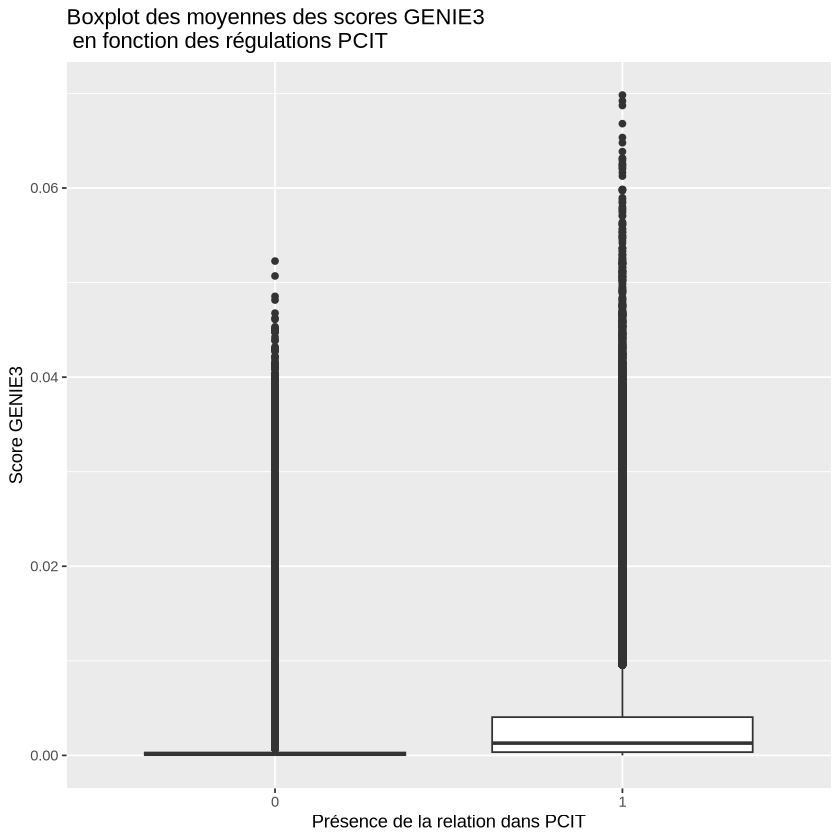

In [17]:
boxplot_scoreGENIE3_PCIT

In [18]:
ggsave(boxplot_scoreGENIE3_PCIT,file="work/figures/boxplot_scoreGENIE3_PCIT.png")

Saving 6.67 x 6.67 in image


In [19]:
dim(merge_sparse[which(merge_sparse$obs_PCIT == "0")])
set.seed(123)
subset_0_PCIT <- sample(1:nrow(merge_sparse[which(merge_sparse$obs_PCIT == "0")]), size = nrow(merge_sparse[which(merge_sparse$obs_PCIT == "1")]), replace = FALSE) 

[1] 73569083        4

In [20]:
dim(merge_sparse[which(merge_sparse$obs_PCIT == "0")][subset_0_PCIT,])

[1] 2737238       4

In [21]:
dim(merge_sparse[which(merge_sparse$obs_PCIT == "1")])

[1] 2737238       4

In [22]:
merge_sparse_sample = bind_rows(merge_sparse[which(merge_sparse$obs_PCIT == "0")][subset_0_PCIT,],merge_sparse[which(merge_sparse$obs_PCIT == "1")])

In [23]:
dim(merge_sparse_sample)

[1] 5474476       4

In [24]:
boxplot_scoreGENIE3_PCIT_sample = ggplot(merge_sparse_sample, aes(x=obs_PCIT, y=Weight))+geom_boxplot()+labs(title='Boxplot des moyennes des scores GENIE3 \n en fonction des régulations PCIT sur un echantillon',x='Présence de la relation dans PCIT',y='Score GENIE3')

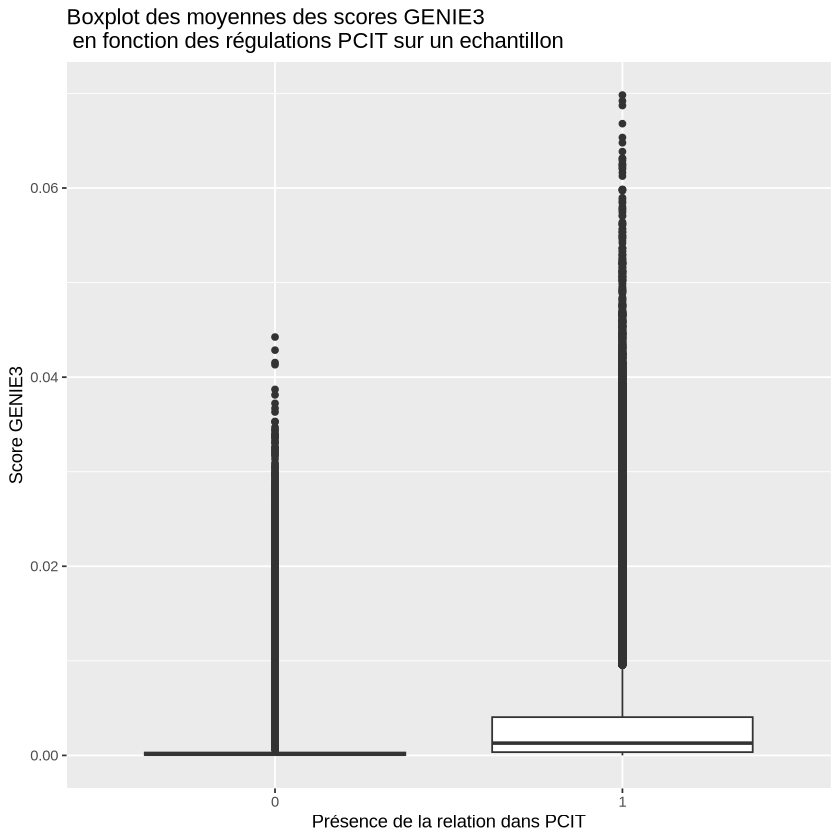

In [25]:
boxplot_scoreGENIE3_PCIT_sample

In [26]:
ggsave(boxplot_scoreGENIE3_PCIT_sample,file="work/figures/boxplot_scoreGENIE3_PCIT_sample.png")

Saving 6.67 x 6.67 in image


## Violin Plot

In [27]:
violinplot_scoreGENIE3_PCIT = ggplot(merge_sparse, aes(x = obs_PCIT, y = Weight)) +
  geom_violin(trim = FALSE) +
  labs(title = 'Violin plot des moyennes des scores GENIE3 \n en fonction des régulations PCIT',
       x = 'Présence de la relation dans PCIT',
       y = 'Score GENIE3')

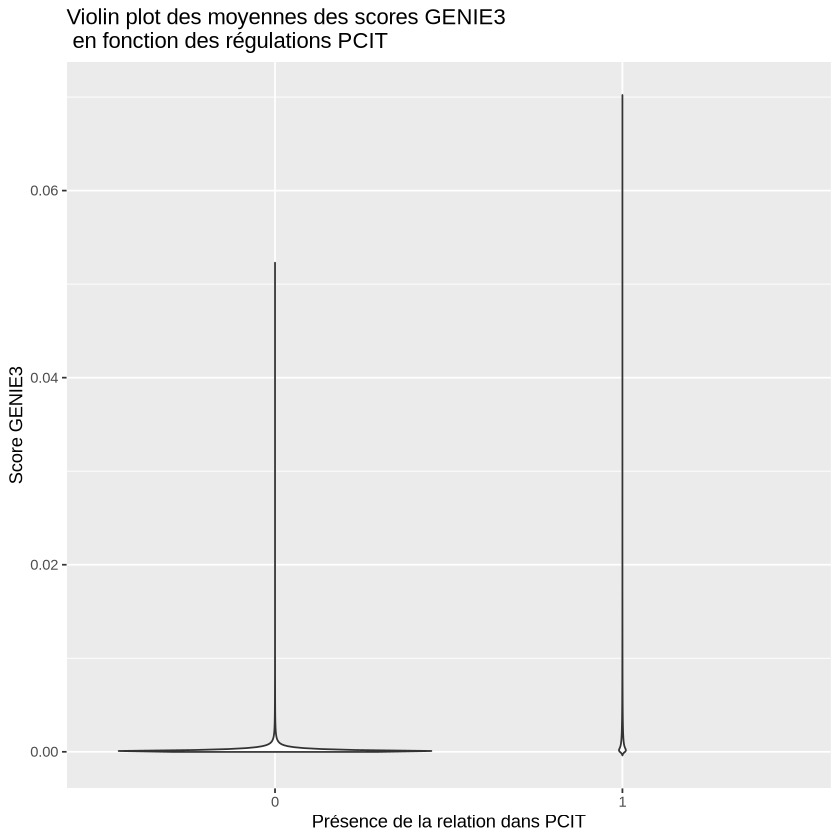

In [28]:
violinplot_scoreGENIE3_PCIT

In [29]:
ggsave(violinplot_scoreGENIE3_PCIT,file="work/figures/violinplot_scoreGENIE3_PCIT.png")

Saving 6.67 x 6.67 in image


In [30]:
violinplot_scoreGENIE3_PCIT_sample = ggplot(merge_sparse_sample, aes(x = obs_PCIT, y = Weight)) +
  geom_violin(trim = FALSE) +
  labs(title = 'Violin plot des moyennes des scores GENIE3 \n en fonction des régulations PCIT sur un echantillon',
       x = 'Présence de la relation dans PCIT',
       y = 'Score GENIE3')

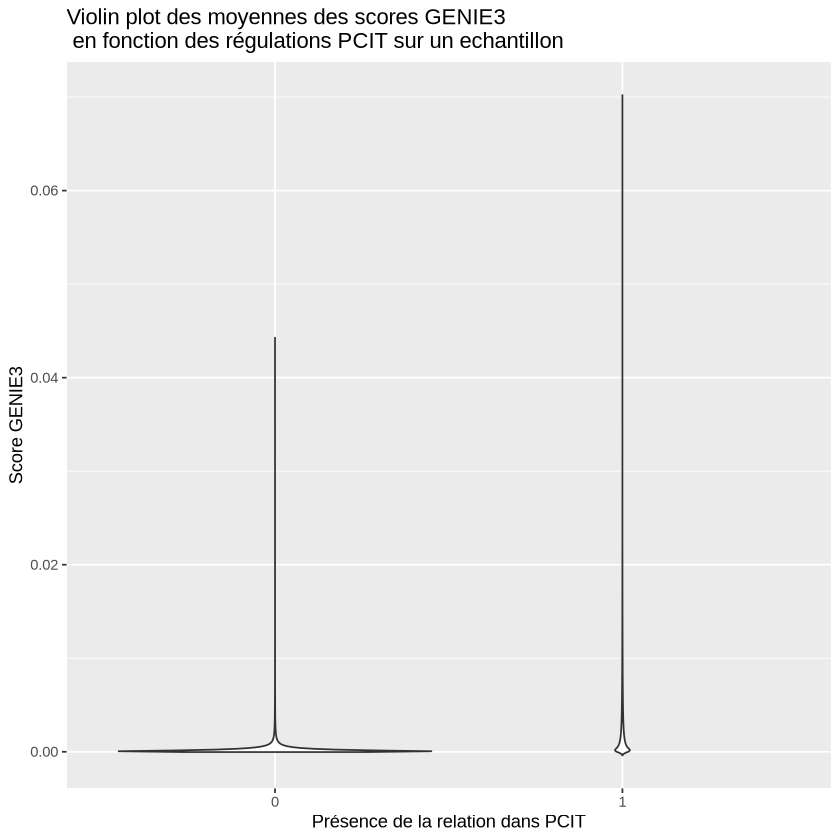

In [31]:
violinplot_scoreGENIE3_PCIT_sample

In [32]:
ggsave(violinplot_scoreGENIE3_PCIT_sample,file="work/figures/violinplot_scoreGENIE3_PCIT_sample.png")

Saving 6.67 x 6.67 in image


In [19]:
#Mean comparison test
merge_sparse_1 = merge_sparse %>% filter(obs_PCIT == 1)
merge_sparse_0 = merge_sparse %>% filter(obs_PCIT == 0)
print(wilcox.test(merge_sparse_1$Weight, merge_sparse_0$Weight))


	Wilcoxon rank sum test with continuity correction

data:  merge_sparse_1$Weight and merge_sparse_0$Weight
W = 1.68e+14, p-value < 2.2e-16
alternative hypothesis: true location shift is not equal to 0



In [33]:
GENIE3_linklist_ordered = GENIE3_linklist[order(-GENIE3_linklist$Weight), ]
head(GENIE3_linklist_ordered)

RegulatoryGene TargetGene       Weight    
1 mirdeep2.6402  LOC_000000009739 0.06983171
2 mirdeep2.6402  LOC_000000006644 0.06920978
3 mirdeep2.6402  LOC_000000026738 0.06872115
4 mirdeep2.6402  LOC_000000072268 0.06680601
5 mirdeep2.6179  LOC_000000006644 0.06534233
6 mirdeep2.6402  LOC_000000004932 0.06478655

In [34]:
dim(edges_PCIT)

[1] 2737238       3

In [35]:
# Create regulation pairs for each dataframe
couple_GENIE3 <- paste(GENIE3_linklist_ordered[1:nrow(edges_PCIT)]$RegulatoryGene, GENIE3_linklist_ordered[1:nrow(edges_PCIT)]$TargetGene)
couple_PCIT <- paste(edges_PCIT$RegulatoryGene, edges_PCIT$TargetGene)

In [36]:
display_venn <- function(x, names, colors,filename) {
  if (!require("VennDiagram")) install.packages("VennDiagram")
  library(VennDiagram)
  
  # Créer l'objet diagramme de Venn
  venn_object <- venn.diagram(
    x = x,
    filename = NULL,
    category.names = names,
    # Circles
    lwd = 2,
    lty = 'blank',
    fill = colors,
    # Numbers
    cex = .6,
    fontface = "bold",
    fontfamily = "sans",
    # Set names
    cat.cex = 0.6,
    cat.fontface = "bold",
    cat.default.pos = "outer",
    cat.pos = c(-27, 27),
    cat.dist = c(0.055, 0.055),
    cat.fontfamily = "sans"
  )

  # Sauvegarder l'image
  png(filename = filename, width = 800, height = 800, res = 300)
  grid.draw(venn_object)
  dev.off()

  # Afficher également l'image à l'écran
  grid.newpage()
  grid.draw(venn_object)
}


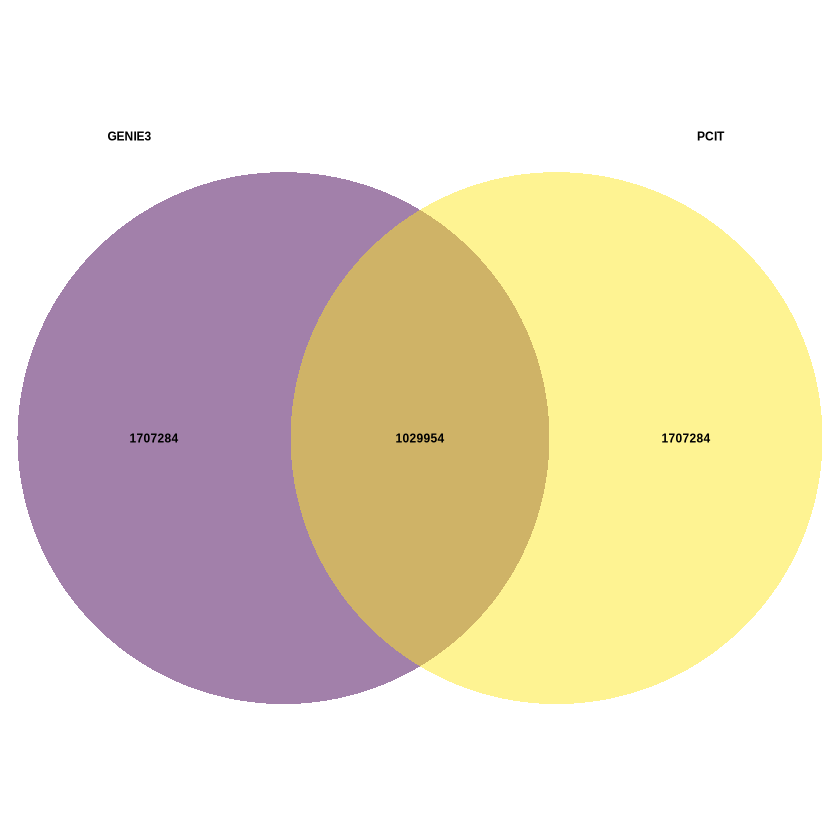

In [37]:
display_venn(list(couple_GENIE3, couple_PCIT),c("GENIE3", "PCIT"),c("#440154ff", '#fde725ff'),"work/figures/Venn_GENIE3_PCIT.png")

In [46]:
Targetscan <- data.table::fread(file = "work/result/aggregation/targetscan_gene_mirdeep_known_filtered.csv",col.names = c("TargetGene","RegulatoryGene","Type","Start","End"), sep=",",data.table=FALSE)

In [49]:
Targetscan_linklist = unique(Targetscan[,c("TargetGene","RegulatoryGene")])

In [50]:
dim(Targetscan_linklist)

[1] 3216561       2

In [51]:
couple_GENIE3_2 <- paste(GENIE3_linklist_ordered[1:nrow(Targetscan_linklist)]$RegulatoryGene, GENIE3_linklist_ordered[1:nrow(Targetscan_linklist)]$TargetGene)
couple_Targetscan <- paste(Targetscan_linklist$RegulatoryGene,Targetscan_linklist$TargetGene)

In [52]:
length(couple_GENIE3_2)

[1] 3216561

In [53]:
length(couple_Targetscan)

[1] 3216561

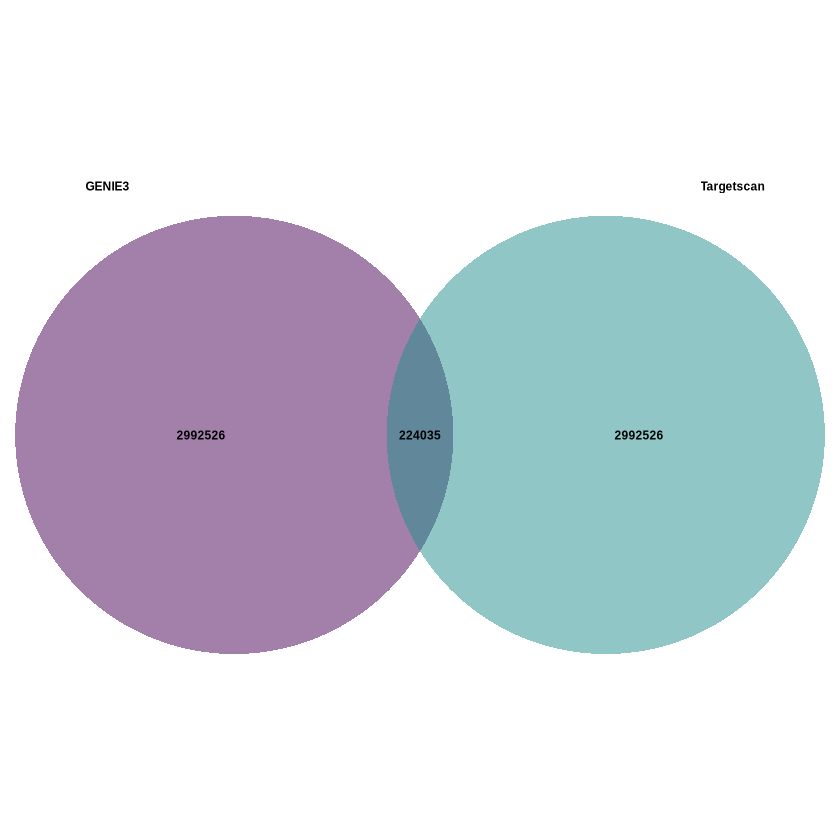

In [54]:
venn_GENIE3_Targetscan = display_venn(list(couple_GENIE3_2, couple_Targetscan),c("GENIE3", "Targetscan"),c("#440154ff", '#21908dff'),"work/figures/Venn_GENIE3_Targetscan.png")

In [55]:
intersection <- intersect(couple_GENIE3_2, couple_Targetscan)

In [56]:
write.csv(data.frame(intersection), file = "work/result/notebook/intersect_GENIE3_Targetscan.csv", row.names = FALSE)

In [57]:
 merge_sparse_sorted = merge_sparse[order(-merge_sparse$Weight), ]

In [58]:
head(merge_sparse_sorted)

RegulatoryGene TargetGene       Weight     obs_PCIT
1 mirdeep2.6402  LOC_000000009739 0.06983171 1       
2 mirdeep2.6402  LOC_000000006644 0.06920978 1       
3 mirdeep2.6402  LOC_000000026738 0.06872115 1       
4 mirdeep2.6402  LOC_000000072268 0.06680601 1       
5 mirdeep2.6179  LOC_000000006644 0.06534233 1       
6 mirdeep2.6402  LOC_000000004932 0.06478655 1

In [59]:
merge_sparse_sorted$Rank = 1:nrow(merge_sparse_sorted)

In [60]:
head(merge_sparse_sorted)

RegulatoryGene TargetGene       Weight     obs_PCIT Rank
1 mirdeep2.6402  LOC_000000009739 0.06983171 1        1   
2 mirdeep2.6402  LOC_000000006644 0.06920978 1        2   
3 mirdeep2.6402  LOC_000000026738 0.06872115 1        3   
4 mirdeep2.6402  LOC_000000072268 0.06680601 1        4   
5 mirdeep2.6179  LOC_000000006644 0.06534233 1        5   
6 mirdeep2.6402  LOC_000000004932 0.06478655 1        6

In [61]:
dim(merge_sparse_sorted)

[1] 76306321        5

In [62]:
merge_sparse_sorted_filtered = merge_sparse_sorted %>% filter(obs_PCIT == 1)

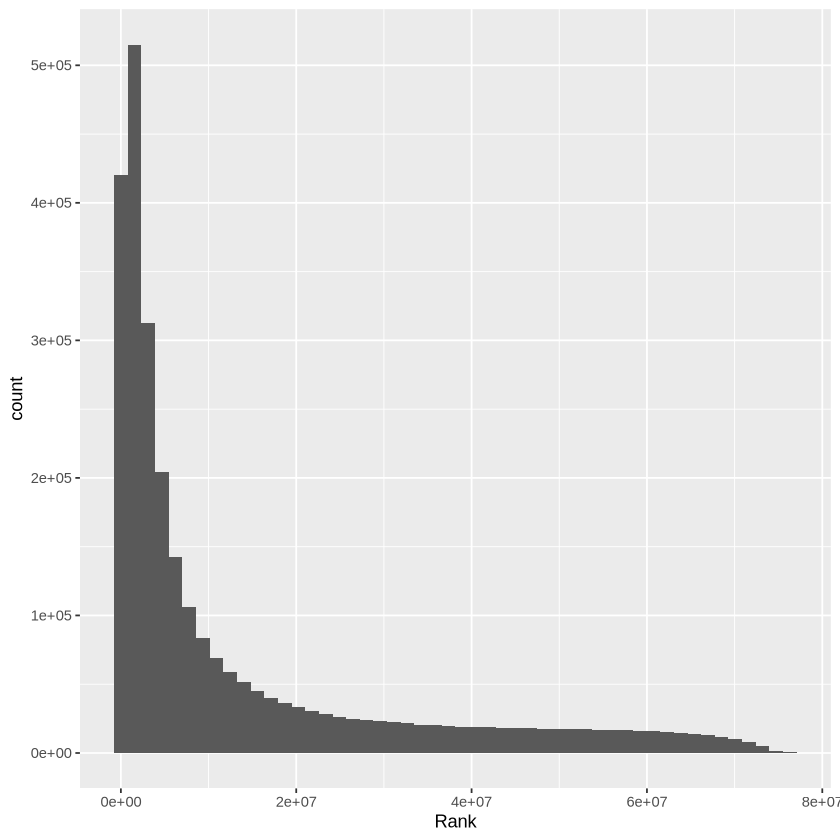

In [63]:
ggplot(merge_sparse_sorted_filtered, aes(x=Rank)) +
  geom_histogram(position="dodge",bins=50)

In [64]:
hist_rank_PCIT = ggplot()+ geom_density(data=merge_sparse_sorted_filtered,aes(x=Rank,y = after_stat(density)),alpha=.2, fill = "blue")

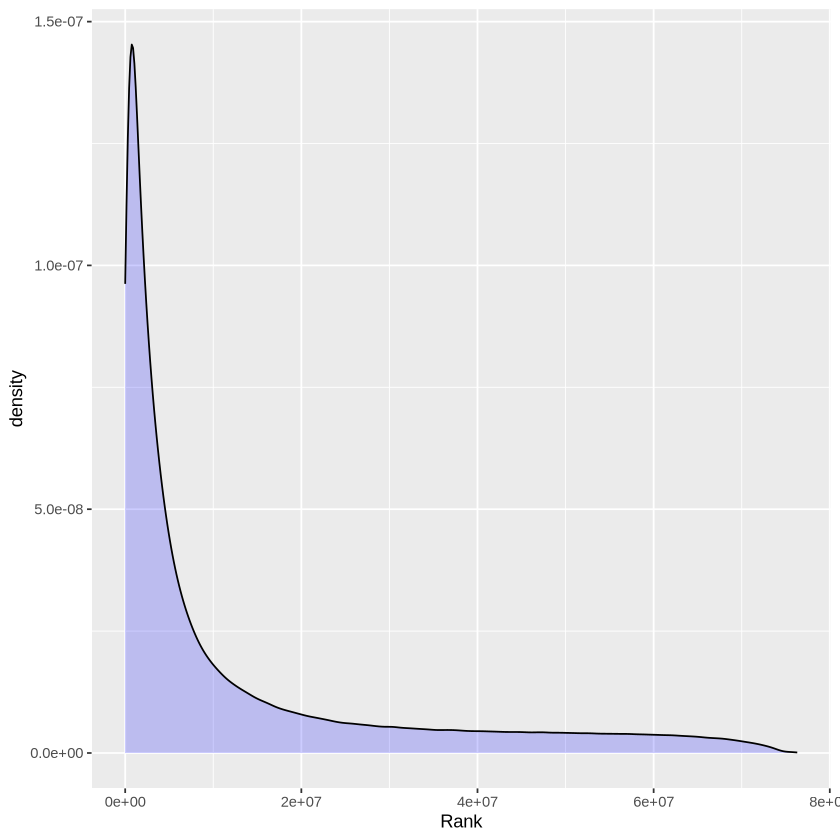

In [65]:
hist_rank_PCIT

In [66]:
ggsave(hist_rank_PCIT, file="work/figures/hist_rank_PCIT.png")

Saving 6.67 x 6.67 in image


In [67]:
#Comparison with random distribution
merge_sparse_random = merge_sparse[,c(1,2,4)]

In [68]:
head(merge_sparse_random)

RegulatoryGene TargetGene       obs_PCIT
1 mirdeep2.100   LOC_000000000000 0       
2 mirdeep2.100   LOC_000000000001 0       
3 mirdeep2.100   LOC_000000000002 0       
4 mirdeep2.100   LOC_000000000003 0       
5 mirdeep2.100   LOC_000000000004 0       
6 mirdeep2.100   LOC_000000000005 0

In [69]:
set.seed(123)
merge_sparse_random$randomWeight = runif(n=nrow(merge_sparse_random),min=0,max=1)

In [70]:
head(merge_sparse_random)

RegulatoryGene TargetGene       obs_PCIT randomWeight
1 mirdeep2.100   LOC_000000000000 0        0.2875775   
2 mirdeep2.100   LOC_000000000001 0        0.7883051   
3 mirdeep2.100   LOC_000000000002 0        0.4089769   
4 mirdeep2.100   LOC_000000000003 0        0.8830174   
5 mirdeep2.100   LOC_000000000004 0        0.9404673   
6 mirdeep2.100   LOC_000000000005 0        0.0455565

In [71]:
summary(merge_sparse_random)

 RegulatoryGene      TargetGene          obs_PCIT          randomWeight   
 Length:76306321    Length:76306321    Length:76306321    Min.   :0.0000  
 Class :character   Class :character   Class :character   1st Qu.:0.2499  
 Mode  :character   Mode  :character   Mode  :character   Median :0.4999  
                                                          Mean   :0.5000  
                                                          3rd Qu.:0.7500  
                                                          Max.   :1.0000  

In [72]:
 merge_sparse_random_sorted = merge_sparse_random[order(-merge_sparse_random$randomWeight), ]

In [73]:
head(merge_sparse_random_sorted)

RegulatoryGene TargetGene       obs_PCIT randomWeight
1 mirdeep2.2827  LOC_000000221530 0        1.0000000   
2 mirdeep2.40    LOC_000000141015 0        1.0000000   
3 mirdeep2.2645  LOC_000000009567 0        1.0000000   
4 mirdeep2.4514  LOC_000000024300 0        1.0000000   
5 mirdeep2.1743  LOC_000000002620 0        1.0000000   
6 mirdeep2.5011  LOC_000000001907 0        0.9999999

In [74]:
merge_sparse_random_sorted$Rank = 1:nrow(merge_sparse_random_sorted)

In [75]:
merge_sparse_random_sorted_filtered = merge_sparse_random_sorted %>% filter(obs_PCIT == 1)

In [76]:
head(merge_sparse_random_sorted_filtered)

RegulatoryGene TargetGene       obs_PCIT randomWeight Rank
1 mirdeep2.3217  LOC_000000027957 1        0.9999997     29 
2 mirdeep2.3864  LOC_000000018975 1        0.9999995     47 
3 mirdeep2.5944  LOC_000000020666 1        0.9999989     99 
4 mirdeep2.5948  LOC_000000043302 1        0.9999987    113 
5 mirdeep2.223   LOC_000000178156 1        0.9999987    115 
6 mirdeep2.4947  LOC_000000009482 1        0.9999978    178

In [77]:
hist_rank_PCITvsRandom = ggplot()+ geom_density(data=merge_sparse_sorted_filtered,aes(x=Rank,y = after_stat(density)),alpha=.2, fill = "blue") +
  geom_density(data=merge_sparse_random_sorted_filtered,aes(x=Rank,y = after_stat(density)),alpha=.2, fill = "red")


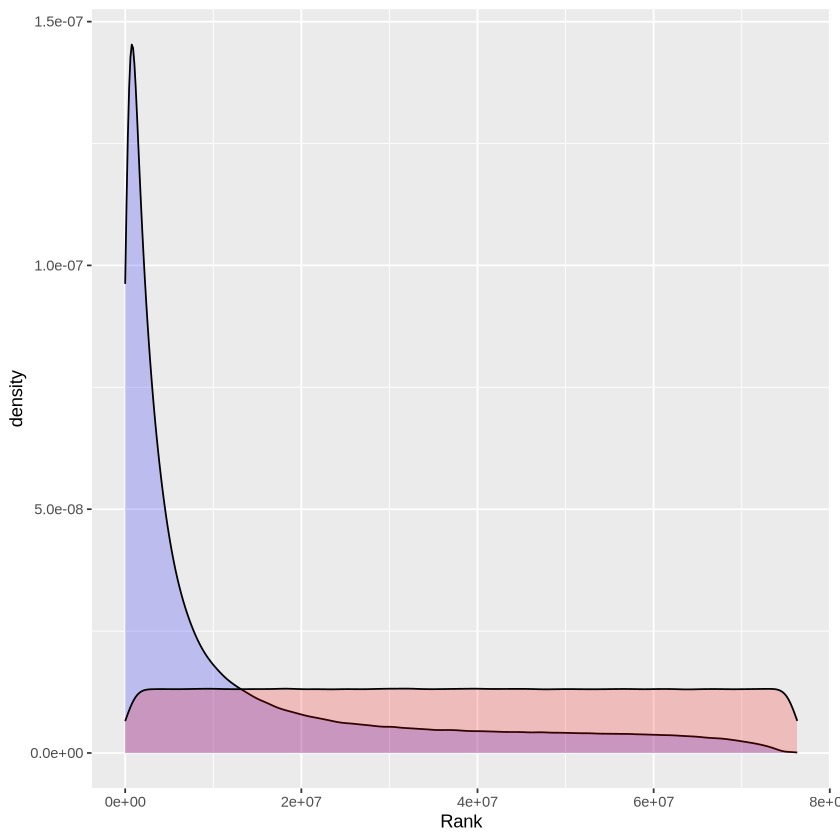

In [78]:
hist_rank_PCITvsRandom

In [79]:
ggsave(hist_rank_PCITvsRandom, file="work/figures/hist_rank_PCITvsRandom.png")

Saving 6.67 x 6.67 in image
